<a href="https://colab.research.google.com/github/PragatiUpadhayay/GYM-Front-end/blob/master/PIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [5]:
df = pd.read_csv('/content/diabetes.csv')
df.head()
# df.shape

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.Outcome.value_counts() # checking database skewness

0    500
1    268
Name: Outcome, dtype: int64

In [7]:
df = df.dropna() # dropping rows containing null, if any

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


We observe minimum value of most features is 0, barring age and Diabetes Pedigree Function, which we can assume to be null as no explicit NaN values are present as well as the field cannot be 0, with exceptions such as 'pregnancies'.

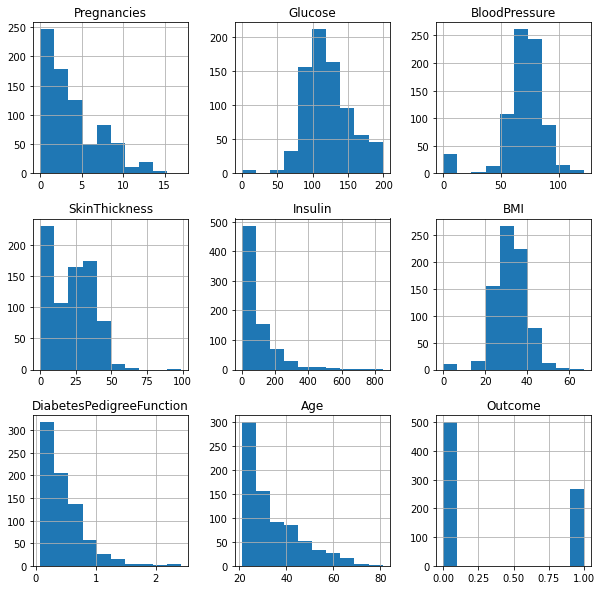

In [9]:
df.hist(bins=10, figsize=(10,10))
plt.show()

In [10]:
# Counting Possible Null Values

print('Blood Pressure:\t', df[df['BloodPressure']==0].shape[0])
print('Glucose:\t', df[df['Glucose']==0].shape[0])
print('Skin Thickness:\t', df[df['SkinThickness']==0].shape[0])
print('Insulin:\t', df[df['Insulin']==0].shape[0])
print('BMI:\t\t', df[df['BMI']==0].shape[0])

Blood Pressure:	 35
Glucose:	 5
Skin Thickness:	 227
Insulin:	 374
BMI:		 11


From histogram, it is apparent that Skin Thickness and Insulin have a skewed distribution, so it is better to replace null values with median than mean. For others, mean is enough as they have a balanced distribution.

In [11]:
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].median())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())

Now we have tackled Null Values, the next step is feature selection. Instead of PCA we can also use correlation to visually differentiate relationships between features.

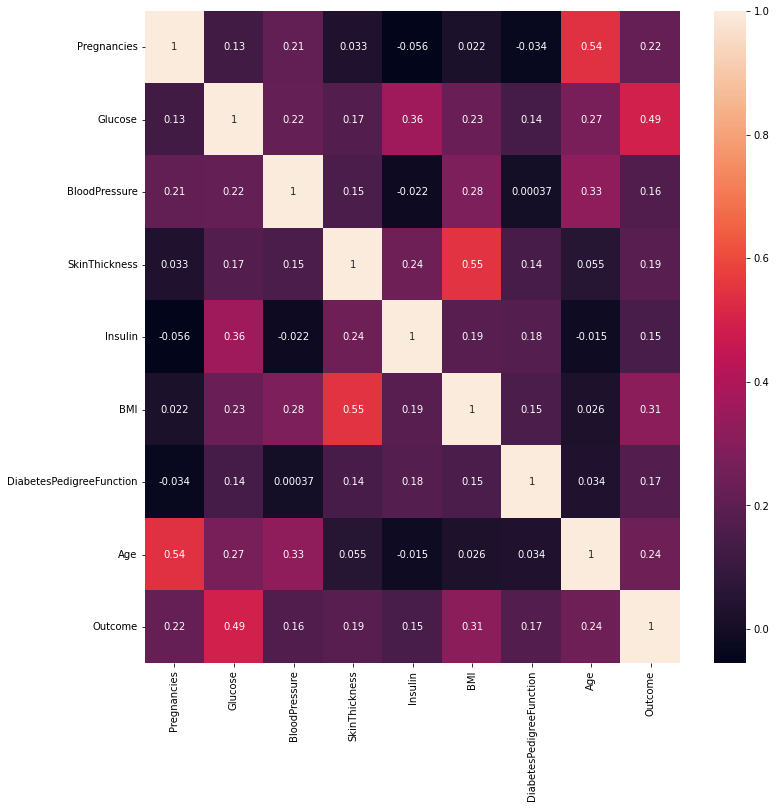

In [12]:
fig, ax = plt.subplots(figsize=(12,12))   
corrmat=df.corr()
sns.heatmap(corrmat, annot=True)

We can see that Glucose, BMI & Age have the highest correlation factor among the others. BloodPressure, Insulin, DiabetesPedigreeFunction are the least correlated, hence they don't contribute much to the model so we can drop them.

In [13]:
df_new = df.drop(['BloodPressure', 'Insulin', 'DiabetesPedigreeFunction'], axis='columns')

In [14]:
X, y = df_new.iloc[:, 0:-1], df.iloc[:, -1]
X.head()

,Pregnancies,Glucose,SkinThickness,BMI,Age
0,6,148.0,35,33.6,50
1,1,85.0,29,26.6,31
2,8,183.0,23,23.3,32
3,1,89.0,23,28.1,21
4,0,137.0,35,43.1,33


In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=0)

In [17]:
print(X_train.shape,y_train.shape, X_test.shape, y_test.shape)

(614, 5) (614,) (154, 5) (154,)


In [18]:
scores = {'DT':[], 'LR':[], 'RF':[], 'KNN': []}

### Decision Tree Classifier

In [19]:
clf = DecisionTreeClassifier()

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [20]:
scores['DT'] = [metrics.accuracy_score(y_test, y_pred), metrics.f1_score(y_test, y_pred), metrics.precision_score(y_test, y_pred), metrics.recall_score(y_test, y_pred)]

In [21]:
print(f"Accuracy:\t{scores['DT'][0]:.2f}\nF1-score:\t{scores['DT'][1]:.2f}\nPrecision:\t{scores['DT'][2]:.2f}\nRecall:\t\t{scores['DT'][3]:.2f}")

Accuracy:	0.73
F1-score:	0.60
Precision:	0.54
Recall:		0.68


### Logistic Regression

In [22]:
logreg = LogisticRegression()

logreg.fit(X_train,y_train)

y_pred=logreg.predict(X_test)

In [23]:
scores['LR'] = [metrics.accuracy_score(y_test, y_pred), metrics.f1_score(y_test, y_pred), metrics.precision_score(y_test, y_pred), metrics.recall_score(y_test, y_pred)]

In [24]:
print(f"Accuracy:\t{scores['LR'][0]:.2f}\nF1-score:\t{scores['LR'][1]:.2f}\nPrecision:\t{scores['LR'][2]:.2f}\nRecall:\t\t{scores['LR'][3]:.2f}")

Accuracy:	0.81
F1-score:	0.64
Precision:	0.73
Recall:		0.57


### K Nearest Neighbours

In [25]:
error_rate = []
for i in range(1,20):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

Finding best neighbour count using elbow method

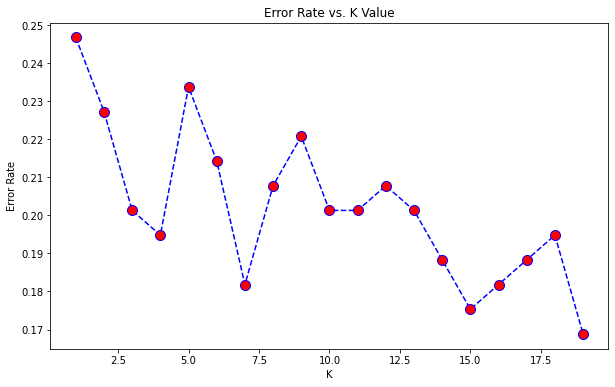

In [26]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

First big dive is on k=4.

In [27]:
knn = KNeighborsClassifier(n_neighbors=4)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [28]:
scores['KNN'] = [metrics.accuracy_score(y_test, y_pred), metrics.f1_score(y_test, y_pred), metrics.precision_score(y_test, y_pred), metrics.recall_score(y_test, y_pred)]

In [29]:
print(f"Accuracy:\t{scores['KNN'][0]:.2f}\nF1-score:\t{scores['KNN'][1]:.2f}\nPrecision:\t{scores['KNN'][2]:.2f}\nRecall:\t\t{scores['KNN'][3]:.2f}")

Accuracy:	0.81
F1-score:	0.62
Precision:	0.77
Recall:		0.51


### Random Forest Classifier

In [30]:
rfc=RandomForestClassifier(n_estimators=100)

rfc.fit(X_train,y_train)

y_pred=rfc.predict(X_test)

In [31]:
scores['RF'] = [metrics.accuracy_score(y_test, y_pred), metrics.f1_score(y_test, y_pred), metrics.precision_score(y_test, y_pred), metrics.recall_score(y_test, y_pred)]

In [32]:
print(f"Accuracy:\t{scores['RF'][0]:.2f}\nF1-score:\t{scores['RF'][1]:.2f}\nPrecision:\t{scores['RF'][2]:.2f}\nRecall:\t\t{scores['RF'][3]:.2f}")

Accuracy:	0.78
F1-score:	0.63
Precision:	0.64
Recall:		0.62


## Observation

In [33]:
print('Model\t\t\tAccuracy\tF1-score\tPrecision\tRecall')
print('-----\t\t\t--------\t--------\t---------\t------')
print(f"Decision Tree\t\t{scores['DT'][0]:.2f}\t\t{scores['DT'][1]:.2f}\t\t{scores['DT'][2]:.2f}\t\t{scores['DT'][3]:.2f}")
print(f"Logistic Regression\t{scores['LR'][0]:.2f}\t\t{scores['LR'][1]:.2f}\t\t{scores['LR'][2]:.2f}\t\t{scores['LR'][3]:.2f}")
print(f"K Nearest Neighbors\t{scores['KNN'][0]:.2f}\t\t{scores['KNN'][1]:.2f}\t\t{scores['KNN'][2]:.2f}\t\t{scores['KNN'][3]:.2f}")
print(f"Random Forest\t\t{scores['RF'][0]:.2f}\t\t{scores['RF'][1]:.2f}\t\t{scores['RF'][2]:.2f}\t\t{scores['RF'][3]:.2f}")

Model			Accuracy	F1-score	Precision	Recall
-----			--------	--------	---------	------
Decision Tree		0.73		0.60		0.54		0.68
Logistic Regression	0.81		0.64		0.73		0.57
K Nearest Neighbors	0.81		0.62		0.77		0.51
Random Forest		0.78		0.63		0.64		0.62


## Conclusion

As we can see, we achieve the best result with KNN & Logistic regression models in terms of accuracy with an efficiency of 81%. But KNN performs slightly better in terms of Precision & Recall scores.